# IMPORT LIBRARY

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


# IMPORT DATASET

In [53]:
dataset = pd.read_excel('CO2 dataset.xlsx')

In [54]:
dataset.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [56]:
dataset['Year'] = pd.to_datetime(dataset['Year'], format = '%Y')

In [57]:
dataset.set_index(['Year'], inplace = True)

In [58]:
dataset.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [59]:
dataset.index.min(), dataset.index.max()

(Timestamp('1800-01-01 00:00:00'), Timestamp('2014-01-01 00:00:00'))

In [60]:
if (dataset.index.max() - dataset.index.min() == 214) :
    print ( 'Data is Continuous')

In [61]:
dataset.index.freq = 'YS'

# TIME SERIES ANALYSIS

<Axes: xlabel='Year'>

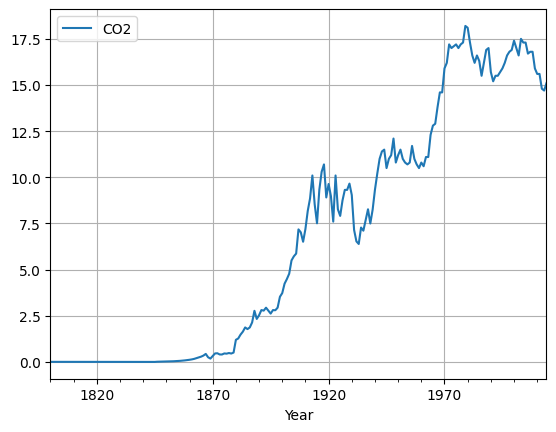

In [62]:
dataset.plot(grid=True)

In [73]:
train_dataset = dataset.loc[:'1991-01-01']
test_dataset = dataset.loc['1992-01-01':]

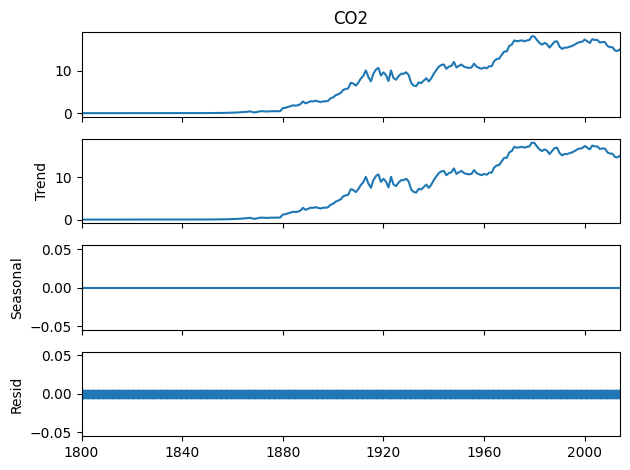

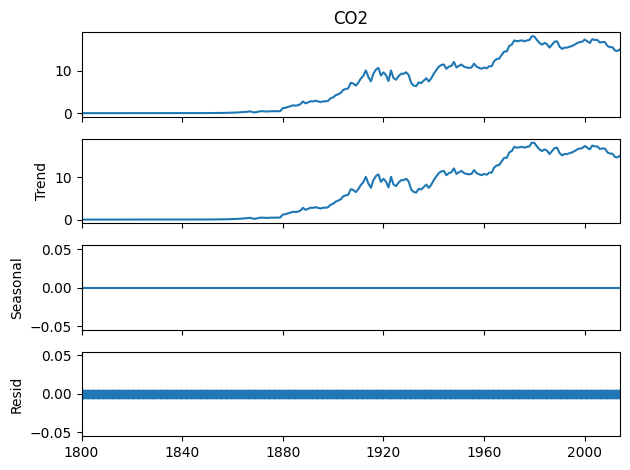

In [64]:
decompose_add = seasonal_decompose(dataset['CO2'])
decompose_add.plot()

In [65]:
def adf_test(timeseries):
    print ('Hasil testing Dikcey-Fuller')
    print ('------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test statistic','p-value', 'Lags Used', 'Number of Observation Used'])
    for key, Value in adftest[4].items() :
        adf_output['Critical Value (%s)' %key] = Value
    print(adf_output)

adf_test(dataset.values)


Hasil testing Dikcey-Fuller
------------------------------
Test statistic                 -0.378463
p-value                         0.913633
Lags Used                       0.000000
Number of Observation Used    214.000000
Critical Value (1%)            -3.461282
Critical Value (5%)            -2.875143
Critical Value (10%)           -2.574020
dtype: float64


In [66]:
diff_df = dataset.diff()
diff_df.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,-0.00007
1802-01-01,-0.00006
1803-01-01,-0.00007
1804-01-01,-0.00006


In [67]:
diff_df.dropna(inplace=True)

<Axes: xlabel='Year'>

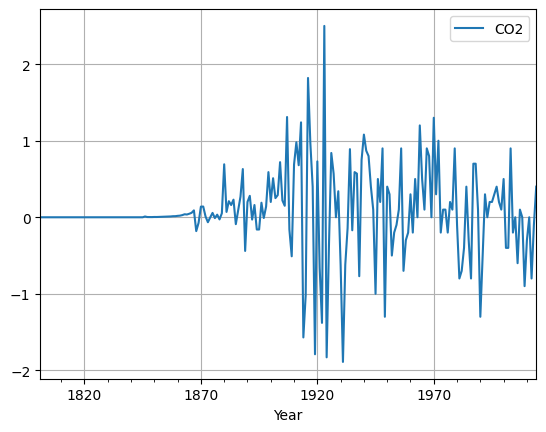

In [68]:
diff_df.plot(grid =True)

In [69]:
adf_test(diff_df)

Hasil testing Dikcey-Fuller
------------------------------
Test statistic                 -3.780005
p-value                         0.003119
Lags Used                      15.000000
Number of Observation Used    198.000000
Critical Value (1%)            -3.463815
Critical Value (5%)            -2.876251
Critical Value (10%)           -2.574611
dtype: float64


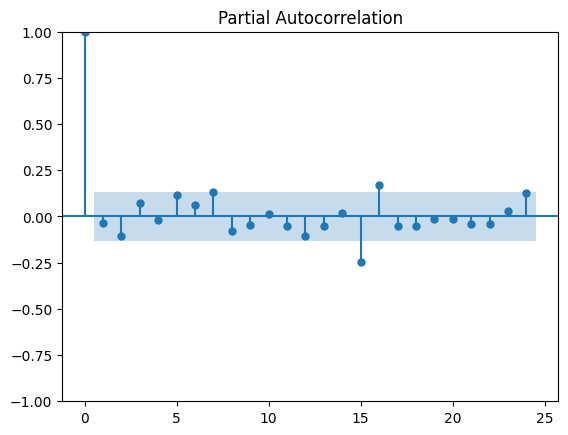

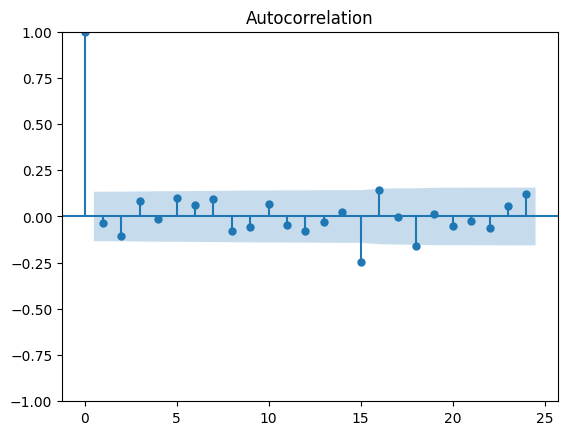

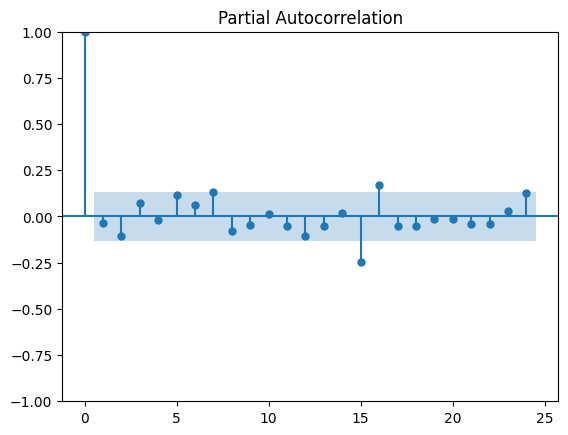

In [70]:
plot_acf(diff_df)
plot_pacf(diff_df)

# SINGLE EXPONENTIAL SMOOTHING

In [71]:
single_exp = SimpleExpSmoothing(train_dataset).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(23)

<Axes: xlabel='Year'>

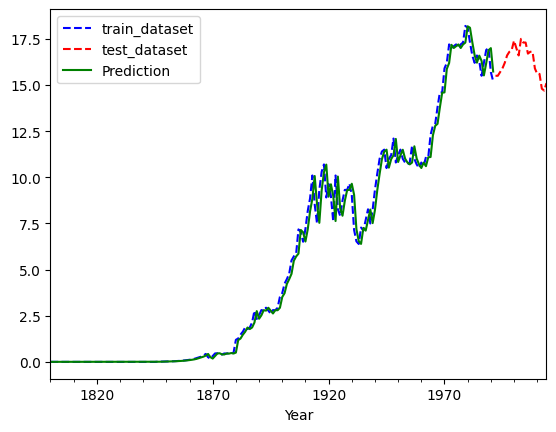

In [76]:
train_dataset['CO2'].plot(style='--', color='blue', legend=True, label='train_dataset')
test_dataset['CO2'].plot(style='--', color ='red', legend=True, label ='test_dataset')
single_exp_train_pred.plot(color='green', legend=True, label = 'Prediction')


In [79]:
print('Train RMSE: ', mean_squared_error(train_dataset, single_exp_train_pred)**0.5)
print('Test RMSE: ', mean_squared_error(test_dataset, single_exp_test_pred)**0.5)
print('Train MAPE: ', mean_absolute_percentage_error(train_dataset,single_exp_train_pred))
print('Test Mape: ', mean_absolute_percentage_error(test_dataset, single_exp_test_pred))

Train RMSE:  0.564692002680021
Test RMSE:  1.3429113022690744
Train MAPE:  0.08470457297144991
Test Mape:  0.06861466412071275


# DOUBLE EXPONENTIAL SMOOTHING

In [80]:
double_exp = ExponentialSmoothing(train_dataset, trend = None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(23)

<Axes: xlabel='Year'>

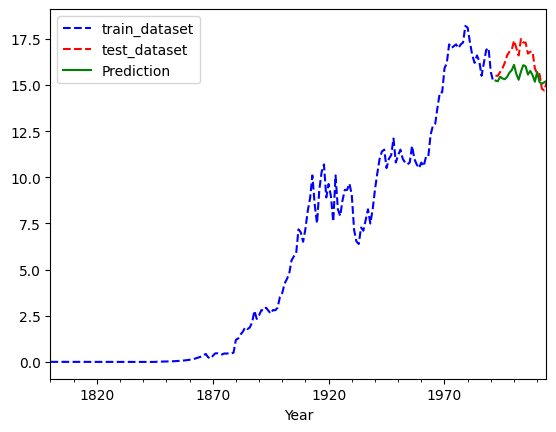

In [81]:
train_dataset['CO2'].plot(style='--', color='blue', legend=True, label='train_dataset')
test_dataset['CO2'].plot(style='--', color ='red', legend=True, label ='test_dataset')
double_exp_test_pred.plot(color='green', legend=True, label = 'Prediction')

In [82]:
print('Train RMSE: ', mean_squared_error(train_dataset, double_exp_train_pred)**0.5)
print('Test RMSE: ', mean_squared_error(test_dataset, double_exp_test_pred)**0.5)
print('Train MAPE: ', mean_absolute_percentage_error(train_dataset,double_exp_train_pred))
print('Test Mape: ', mean_absolute_percentage_error(test_dataset, double_exp_test_pred))

Train RMSE:  0.5576263311586229
Test RMSE:  0.9739218268464459
Train MAPE:  14.72268617058503
Test Mape:  0.050781568455286974


# ARIMA

In [87]:
from statsmodels.tsa.arima.model import ARIMA
ar = ARIMA(train_dataset, order=(15,1,15)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(23)

c:\Users\hanss\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Year'>

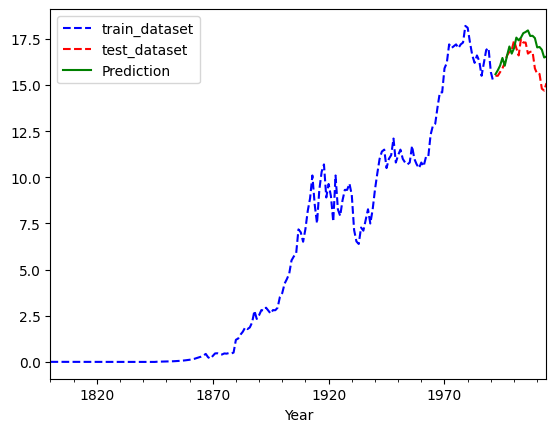

In [88]:
train_dataset['CO2'].plot(style='--', color='blue', legend=True, label='train_dataset')
test_dataset['CO2'].plot(style='--', color ='red', legend=True, label ='test_dataset')
ar_test_pred.plot(color='green', legend=True, label = 'Prediction')

In [90]:
print('Train RMSE: ', mean_squared_error(train_dataset, ar_train_pred)**0.5)
print('Test RMSE: ', mean_squared_error(test_dataset, ar_test_pred)**0.5)
print('Train MAPE: ', mean_absolute_percentage_error(train_dataset,ar_train_pred))
print('Test MAPE: ', mean_absolute_percentage_error(test_dataset, ar_test_pred))

Train RMSE:  0.46780788249321414
Test RMSE:  0.9810708011025377
Train MAPE:  0.08133213640200253
Test MAPE:  0.04872452466982997


# ALGORITMS COMPARISON

In [93]:
comparison_df = pd.DataFrame(data=[
    ['Single Exp Smoothing', 1.3429 , 0.0686],
    ['Double Exp Smoothing', 0.9739 , 0.0507],
    ['ARIMA', 0.9810 , 0.0487]
    ],
    columns=['Model','RMSE', 'MAPE'])
comparison_df.set_index('Model', inplace=True)

In [94]:
comparison_df.sort_values(by='RMSE')

,RMSE,MAPE
Model,,
Double Exp Smoothing,0.5352,0.0260
ARIMA,0.9549,0.0472
Single Exp Smoothing,1.3429,0.0686
